# MIE1624 - Introduction to Data Science and Analytics
# Tutorial 9 - Optimization (Winter 2022)

##### Import the necessary libraries and data

In [ ]:
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
try:

  from google.colab import files
  uploaded = files.upload()

except:

  pass

Saving monthly_closings_2021.csv to monthly_closings_2021.csv


In [ ]:
try:

  from google.colab import files
  uploaded = files.upload()

except:

  pass

Saving monthly_closings_2018_to_2020.csv to monthly_closings_2018_to_2020.csv


In [ ]:
#Load file and into dateframe
monthlyClosing_inSample = 'monthly_closings_2018_to_2020.csv'
monthlyClosing_outSample = 'monthly_closings_2021.csv'

df1 = pd.read_csv(monthlyClosing_inSample)
df2 = pd.read_csv(monthlyClosing_outSample)

#Remove date
price = df1.iloc[:,1:]

#Calculate monthly return as percent change of monthly closing values, reset indices 
ret = price.pct_change().iloc[1:,:]
ret.reset_index(inplace = True, drop = True)


##### Compute the covariance matrix Q and means for each column 

In [ ]:
# Compute the covariance matrix of the percent change of prices
Q = ret.cov().to_numpy()


# Compute the mean for each column 
mu = np.array(np.mean(ret, axis = 0))

# Store number of features 
n = ret.shape[1] 

##### Solve for the minimum variance portfolio

Using the covarinace matrix, solve for the minimum variance portfolio. The function should be constrained so that the sum of all weights is equal to 1. You may use a number other than 1 but it must be consistent for all calucations.

In [ ]:
# Create optimization variable w1, 26 total variables 
w1 = cp.Variable(n)

# Form the problem , minimize
constraints1 = [sum(w1) == 1 , w1 >= 0]
prob1 = cp.Problem(cp.Minimize(cp.quad_form(w1, Q)) , [sum(w1) == 1 , w1 >= 0])

#Solve Problem
prob1.solve(verbose=False)

0.0009278939303461065

In [ ]:
# matrix of allocations which offers the minimum variance 
w_minVar = w1.value #solution value: minimum variance 
w_minVar

array([ 2.34711076e-19,  5.74341943e-20,  8.04974643e-21,  8.47497298e-20,
        1.98801020e-20,  1.09424374e-20,  2.73065413e-20,  2.72299411e-19,
        5.54485957e-02,  1.08374508e-19,  8.96592846e-20,  6.59194971e-01,
       -6.72526425e-20,  2.57096580e-20,  1.76013193e-03,  8.87191244e-02,
        5.48842212e-02, -5.82451239e-20, -4.53773627e-19,  3.42087380e-20,
       -3.00374544e-20,  8.76648789e-20,  9.01180838e-02, -1.21197912e-21,
        4.98748717e-02])

In [ ]:
#Compute the variance of the portfolio
var_minVar = np.dot(w_minVar, np.dot(Q, w_minVar)) #variance
var_minVar

0.0009278939303461066

In [ ]:
#Compute the return of the portfolio
ret_minVar = np.dot(mu, w_minVar) #expected return
ret_minVar

0.008653285914910979

##### Solve for the maximum return portfolio

Using the mean returns for each asset to compute the maximized return portfolio. The function should be constrained so that the sum of all weights is equal to 1. You may use a number other than 1 but it must be consistent for all calucations. 

In [ ]:
# Create optimization variable w2, 26 total variables 
w2 = cp.Variable(n)

constraints2 = [sum(w2) == 1, w2 >= 0]
prob2 = cp.Problem(cp.Maximize(mu.T@w2), constraints2)
                   
# Solve the problem 
prob2.solve(verbose=False)

0.1021163469313111

In [ ]:
# matrix of allocations which offers th
w_maxRet = w2.value #solution value: maximum expected return
w_maxRet

array([4.00446549e-11, 2.33109317e-11, 2.11897368e-11, 2.02514107e-11,
       2.13526338e-11, 2.10766681e-11, 2.36702200e-11, 2.30281295e-11,
       2.20156300e-11, 1.84127151e-11, 1.42266925e-11, 1.97676588e-11,
       1.08469522e-09, 1.88147929e-11, 2.37055006e-11, 1.85314364e-11,
       2.26815434e-11, 2.41212013e-11, 9.99999998e-01, 1.68558540e-11,
       8.78989931e-12, 2.30303345e-11, 2.19747289e-11, 2.02437383e-11,
       1.72961027e-11])

In [ ]:
#Compute the variance of the portfolio
var_maxRet = np.dot(w_maxRet, np.dot(Q, w_maxRet)) #variance
var_maxRet

0.3397485196506799

In [ ]:
#Compute the return of the portfolio
ret_maxRet = np.dot(mu, w_maxRet) #expected return
ret_maxRet

0.10211634693131112

##### Compute classical Markowitz efficent frontier 

For each expected return, ranging from the return of the minimum variance portfolio to return of the maximum return portfolio, compute the optimal portfolio. The set of these optimal portfolios equals the efficient fronteir for the given dataset.

In [ ]:
#Create target ranges for portfolio returns
targetLen = 50
#targetRet = np.linspace(ret_minVar,ret_maxRet,50)
targetRet = np.linspace(ret_minVar,ret_maxRet,targetLen)


In [ ]:
# Define optimization problem and compute one portfolio on efficient frontier
w = cp.Variable(n)
eps = cp.Parameter()

constraints3 = [mu.T@w >= eps,sum(w) == 1,w >= 0]
prob3 = cp.Problem(cp.Minimize(cp.quad_form(w, Q)), constraints3)


In [ ]:
# Compute efficient frontier
w_front_clas = []
var_front_clas = []
ret_front_clas = []
for epsilon in targetRet:
    eps.value = epsilon
    prob3.solve()
    w_front_clas.append(w.value)
    var_front_clas.append(np.dot(w.value, np.dot(Q, w.value)))
    ret_front_clas.append(np.dot(mu, w.value))



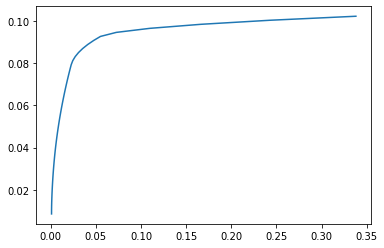

In [ ]:
plt.plot(var_front_clas,ret_front_clas)
plt.show()

##### Compute the resampled efficient frontier 

To compute the resampled frontier, from the origional dateset compute simulated (resampled) data. Form each resampled dataset, compute the new efficient frontier. The efficient frontier for the resampled data is found as the average weight of each asset at each return level along each resampled frontier.

In [ ]:
#Resampling---------------------------------------------------------------------

sample_size = ret.shape[0] 
repetition = 85

#set variables for storing resuts

#Use a random seed so that results will be consistent 
np.random.seed(10)

var_for_each_sample = pd.DataFrame(columns = range(50))
ret_for_each_sample = pd.DataFrame(columns = range(50))
#weights = pd.DataFrame(columns = range(mu.shape[0]))
w_ = []
Q_resample_list,mu_resample_list = [], []
var_minVar_list, ret_minVar_list = [], []
var_maxRet_list, ret_maxRet_list = [], []
var_frontC_list, ret_frontC_list = [], []
o=0
#Resample by taking n (sample size) draws from the original input
for i in range(repetition):
    
    #resample by drawing from the multivariate normal distribution with mu and Q
    x_resample = np.random.multivariate_normal(mu,Q ,sample_size)

    #Calculate the new mean vector (mu_resample) and new variance-covariance matrix (Q _resample) 
    #resampled mu and Q

    mu_resample = np.array(np.mean(x_resample, axis = 0))
    Q_resample = np.cov(x_resample,rowvar = False)
    

    #Compute minimum variance

    w1 = cp.Variable(n)
    constraints1 = [sum(w1) == 1 , w1 >= 0]
    prob1 = cp.Problem(cp.Minimize(cp.quad_form(w1, Q_resample)) , [sum(w1) == 1 , w1 >= 0])
    prob1.solve(verbose=False)

    w_minVar_sam = w1.value #solution value: minimum variance
    var_minVar_sam = np.dot(w_minVar_sam, np.dot(Q_resample, w_minVar_sam)) #variance
    ret_minVar_sam = np.dot(mu_resample, w_minVar_sam) #expected return
    
    var_minVar_list.append(var_minVar_sam)
    ret_minVar_list.append(ret_minVar_sam)
    #compute maximum expected return

    w2 = cp.Variable(n)
    constraints2 = [sum(w2) == 1, w2 >= 0]
    prob2 = cp.Problem(cp.Maximize(mu_resample.T@w2), constraints2)
    prob2.solve(verbose=False)

    w_maxRet_sam = w2.value #solution value: maximum expected return
    var_maxRet_sam = np.dot(w_maxRet_sam, np.dot(Q_resample, w_maxRet_sam)) #variance
    ret_maxRet_sam = np.dot(mu_resample, w_maxRet_sam) #expected return
    
    
    #target return

    targetRet_1 = np.linspace(ret_minVar_sam,ret_maxRet_sam,50)
    
    # Define optimization problem and compute one portfolio on efficient frontier
    w_re = cp.Variable(n)
    eps_re = cp.Parameter()

    constraints4 = [mu_resample.T@w_re >= eps_re,sum(w_re) == 1,w_re >= 0]
    prob4 = cp.Problem(cp.Minimize(cp.quad_form(w_re, Q_resample)), constraints4)
    
    # Compute efficient frontier
    
    w_front_resam = []
    var_front_resam = []
    ret_front_resam = []
    for epsilon in targetRet_1:
          eps_re.value = epsilon
          prob4.solve(verbose=False)
          w_front_resam.append(w_re.value)
          var_front_resam.append(np.dot(w_re.value, np.dot(Q_resample, w_re.value)))
          ret_front_resam.append(np.dot(mu_resample, w_re.value))
  
    w_.append(w_front_resam)
    


    #Store results for each resampling
    mu_resample_list.append(mu_resample)
    Q_resample_list.append(Q_resample)
    var_minVar_list.append(var_minVar_sam)
    ret_minVar_list.append(ret_minVar_sam)
    var_maxRet_list.append(var_maxRet_sam)
    ret_maxRet_list.append(ret_maxRet_sam)
  
    var_frontC_list.append(var_front_resam)
    ret_frontC_list.append(ret_front_resam)
    o = o + 1






In [ ]:
#compute the average weights at each return level
w_ = np.array(w_)
a=np.mean(w_, axis = 0)
a.shape

(50, 25)

In [ ]:
#compute the resampled efficient frontier based on the average weights and orignial mu & Q
var_front_resample = []
ret_front_resample = []
counter = 0
for epsilon in targetRet:
    eps.value = epsilon
    w = a[counter]
    var_front_resample.append(np.dot(w, np.dot(Q, w)))
    ret_front_resample.append(np.dot(mu, w))
    counter += 1

<function matplotlib.pyplot.show>

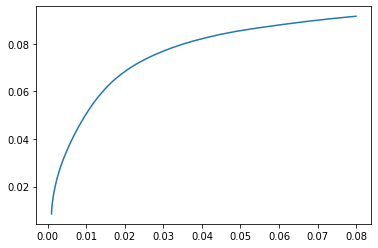

In [ ]:
#Efficient Frontier for resampled data------------------------------------------
plt.plot(var_front_resample,ret_front_resample,)
plt.show

##### For the classical frontier, determine and store the portfolio weights for the minimum variance, maximum return, and Sharpe ratio optimized portfolio's

The Sharpe ratio of each portfolio is calculatd as the (portfolio return - the risk free rate) / portfolio standard deviation
Use a risk free rate of 0.2% (0.002) monthly.

In [ ]:
riskFreeRate = 0.002

In [ ]:
#Determine weights of minimum variance and maximum return along the efficient frontier 

#Min variance
orig_weights_minVar = w_front_clas[0]
print(orig_weights_minVar)

#Max return 
orig_weights_maxRet = w_front_clas[targetLen - 1]
print(orig_weights_maxRet)

#-------------------------------------------------------------------------------
#Min variance for resampled data
resampled_weights_minVar = a[0]
print(resampled_weights_minVar)

#Max return for resampled data
resampled_weights_maxRet = a[targetLen - 1]
print(resampled_weights_maxRet)

[ 3.27231831e-19 -1.14158479e-20 -8.31044264e-22  1.11997265e-19
  1.90860299e-20  1.70009911e-20 -2.67194251e-20  8.07705709e-20
  5.54485957e-02  8.99771706e-20  9.08772980e-20  6.59194971e-01
  9.71760135e-20  3.48214411e-20  1.76013193e-03  8.87191244e-02
  5.48842212e-02 -8.25234018e-20 -1.26897129e-20  4.97872186e-20
  4.42501729e-20  2.33161871e-20  9.01180838e-02  8.74792459e-21
  4.98748717e-02]
[-3.76641102e-06 -1.77166188e-05 -1.49411040e-05 -1.42144539e-05
 -1.51396656e-05 -1.48400654e-05 -1.82149993e-05 -1.68212576e-05
 -1.57762971e-05 -1.29763636e-05 -1.10578558e-05 -1.38682043e-05
  3.08286479e-03 -1.32110420e-05 -1.83544519e-05 -1.30632427e-05
 -1.65074295e-05 -1.97159273e-05  9.97247721e-01 -1.22010830e-05
 -8.89732576e-06 -1.70065598e-05 -1.57004597e-05 -1.41831308e-05
 -1.23959239e-05]
[ 1.01861669e-19  1.78270925e-20  3.40281834e-21  3.45061701e-03
  2.80019286e-03  1.05518225e-20  1.73869043e-20  7.77982107e-03
  4.20063929e-02  4.09990020e-20  6.59484053e-03  6.21

In [ ]:
#Compute sharp ratio 
ret_array_clas = np.array(ret_front_clas)
var_array_clas = np.array(var_front_clas)

sharpe_array_clas = (ret_array_clas - riskFreeRate)/np.sqrt(var_array_clas)

weights_sharpe_clas = w_front_clas[sharpe_array_clas.argmax()]
print(sharpe_array_clas)
print(sharpe_array_clas.argmax())
print(weights_sharpe_clas)

#Sharp ratio for resampled data-------------------------------------------------
ret_array_resam = np.array(ret_front_resample)
var_array_resam = np.array(var_front_resample)
sharpe_array_resam = (ret_array_resam - riskFreeRate)/np.sqrt(var_array_resam)
weights_sharpe_resam = a[sharpe_array_resam.argmax()]
print(sharpe_array_resam)
print(sharpe_array_resam.argmax())
print(weights_sharpe_resam)

[0.21841729 0.2779752  0.32773819 0.36826694 0.4008428  0.42616046
 0.44633576 0.46249674 0.47546297 0.48590318 0.49436387 0.50110517
 0.50647349 0.51076406 0.51414448 0.51671249 0.51853559 0.51979259
 0.52060704 0.52107556 0.52127386 0.5212614  0.52108501 0.52078165
 0.52038055 0.51990488 0.51937306 0.51879974 0.51819659 0.51757291
 0.51693611 0.51629208 0.51564552 0.51500013 0.51435884 0.51372397
 0.5130749  0.51221715 0.50603401 0.49185411 0.4725573  0.45072256
 0.42824701 0.40633587 0.38565584 0.34302508 0.28490758 0.23611194
 0.19945268 0.17218983]
20
[ 3.03124970e-01 -1.30430698e-05 -4.39969876e-06 -2.13672025e-06
 -4.44145736e-06 -5.14784834e-06 -1.13547226e-05 -1.41828634e-05
 -6.78108651e-06 -2.91792405e-06 -1.35006883e-06  4.07841836e-01
  1.68181902e-01 -2.72338048e-06 -7.20346917e-06 -2.31398753e-06
 -4.41024202e-06 -9.41315954e-06  2.27419957e-02 -2.05413149e-06
  9.82208378e-02 -7.79536737e-06 -3.38124682e-06 -4.11943405e-06
 -2.37055970e-06]
[0.21028353 0.2515833  0.2882

##### For each of the 6 portfolios, calculate the expected return on the 2021 (out-of-sample) data


In [ ]:
#drop date
price2021 = df2.iloc[:,1:]

#We want return for the whole year so only use first and last month
price2021_ = price2021.drop(price2021.index[1:11])
price2021_.reset_index(inplace = True, drop = True)

#Compute percent change
ret_2021 = price2021_.pct_change().iloc[1:,:]

ret_2021

,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
1,0.68029,0.446726,0.366112,-0.53201,0.982391,0.522067,0.077665,1.051282,0.029505,0.302017,...,0.521509,0.043312,0.04601,-0.584591,0.269255,0.353931,0.458557,-0.256478,0.261573,0.128286


In [ ]:
#From classical frontier find
#Minimum variance portfolio
#orig_weights_minVar
orig_minVar_ret2021 = np.dot(ret_2021, orig_weights_minVar)
print(orig_minVar_ret2021)


#Maximum return portfolio
#orig_weights_maxRet
orig_maxRet_ret2021 = np.dot(ret_2021, orig_weights_maxRet)
print(orig_maxRet_ret2021)

#Sharpe ratio portfolio
#orig_weights_sharpe
orig_sharpe_ret2021 = np.dot(ret_2021, weights_sharpe_clas)
print(orig_sharpe_ret2021)


#From resampled frontier--------------------------------------------------------

# Minimum variance portfolio
Resampled_minVar_ret2021 = np.dot(ret_2021, resampled_weights_minVar)
print(Resampled_minVar_ret2021)

#Maximum return portfolio
#orig_weights_maxRet
Resampled_maxRet_ret2021 = np.dot(ret_2021, resampled_weights_maxRet)
print(Resampled_maxRet_ret2021)

#Sharpe ratio portfolio
#orig_weights_sharpe
Resampled_sharpe_ret2021 = np.dot(ret_2021, weights_sharpe_resam)
print(Resampled_sharpe_ret2021)

[0.02822425]
[-0.58205562]
[0.27953409]
[0.05876436]
[0.00962853]
[0.325227]


In [ ]:
#Compute returns on $1000

#Compute returns on $1000

print('Out-of-sample returns on $1000 investment: \n')
print('On the Classical Efficient Frontier, the minimum variance portfolio returns $' , orig_minVar_ret2021*1000)
print('On the Classical Efficient Frontier, the maximum return portfolio returns $' , orig_maxRet_ret2021*1000)
print('On the Classical Efficient Frontier, the optimal Sharpe ratio portfolio returns $' , orig_sharpe_ret2021*1000 , '\n')
print('On the Resampled Efficient Frontier, the minimum variance portfolio returns $' , Resampled_minVar_ret2021*1000)
print('On the Resampled Efficient Frontier, the maximum return portfolio returns $' , Resampled_maxRet_ret2021*1000)
print('On the Resampled Efficient Frontier, the optimal Sharpe ratio portfolio returns $' , Resampled_sharpe_ret2021*1000)

Out-of-sample returns on $1000 investment: 

On the Classical Efficient Frontier, the minimum variance portfolio returns $ [28.22424688]
On the Classical Efficient Frontier, the maximum return portfolio returns $ [-582.05561928]
On the Classical Efficient Frontier, the optimal Sharpe ratio portfolio returns $ [279.53409065] 

On the Resampled Efficient Frontier, the minimum variance portfolio returns $ [58.76436015]
On the Resampled Efficient Frontier, the maximum return portfolio returns $ [9.62852516]
On the Resampled Efficient Frontier, the optimal Sharpe ratio portfolio returns $ [325.22699589]


In [ ]:
len(Q_resample_list)

85

### 3. Plot the classical and resampled efficient frontiers [10pts]

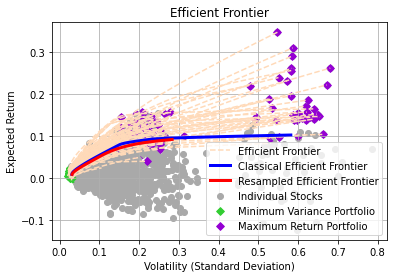

In [ ]:
#Missing varianble  - do not run

axC = plt.gca()
plt.rcParams['figure.figsize'] = [9, 8]
#*********************CHANGE RANGE TO repetition WHEN SOLVER ISSUE IS RESOLVED(solver terminates before 100 repetitions)
for i in range(repetition):
    # Plot volatility versus expected return for individual stocks
    axC.scatter(x=np.sqrt(np.diag(Q_resample_list[i])), y=mu_resample_list[i], color='darkgray', label='Individual Stocks' if i == 0 else "")
    
    # Plot volatility versus expected return for mimimum variance portfolio
    axC.scatter(x=np.sqrt(var_minVar_list[i]), y=ret_minVar_list[i], marker='D', s=30,  color='limegreen', label='Minimum Variance Portfolio' if i == 0 else "")

    # Plot volatility versus expected return for maximum return portfolio
    axC.scatter(x=np.sqrt(var_maxRet_list[i]), y=ret_maxRet_list[i],  marker='D', s=30, color='darkviolet', label='Maximum Return Portfolio' if i == 0 else "")

    # Plot efficient frontier
    axC.plot(np.sqrt(var_frontC_list[i]), ret_frontC_list[i], '--', color='peachpuff', label='Efficient Frontier' if i == 0 else "")

#Plot the classical mean-variance efficient frontier
axC.plot(np.sqrt(var_front_clas), ret_front_clas, color='blue', linewidth=3, label='Classical Efficient Frontier')

#Plot the resampled efficient frontier
axC.plot(np.sqrt(var_front_resample), ret_front_resample, color='red', linewidth=3, label='Resampled Efficient Frontier')

axC.set_xlabel('Volatility (Standard Deviation)')
axC.set_ylabel('Expected Return')
plt.title('Efficient Frontier')
axC.legend(loc="lower right")
axC.grid()
plt.show()



### 4.	Plot the portfolio compositions for classical and resampled frontiers. [15pts]

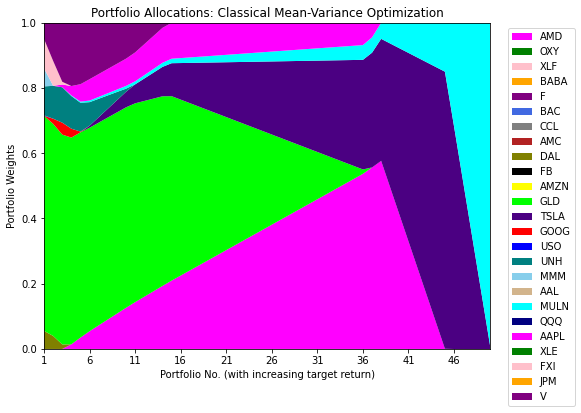

In [ ]:
x_tick = np.arange(len(targetRet))+1
color_list = ['fuchsia','green','pink','orange','purple','royalblue','grey','firebrick','olive','black','yellow','lime','indigo','red','blue','teal','skyblue','tan','cyan','navy']
plt.figure(figsize=(8, 6))
plt.stackplot(x_tick, np.array(w_front_clas).T, colors=color_list)
plt.legend(df1.columns[1:], bbox_to_anchor=(1.2, 1))
plt.xlim((1,len(targetRet)))
plt.ylim((0,1))
plt.xticks(np.arange(1,len(targetRet)+1,5))
plt.xlabel("Portfolio No. (with increasing target return)")
plt.ylabel("Portfolio Weights")
plt.title("Portfolio Allocations: Classical Mean-Variance Optimization")
plt.show()

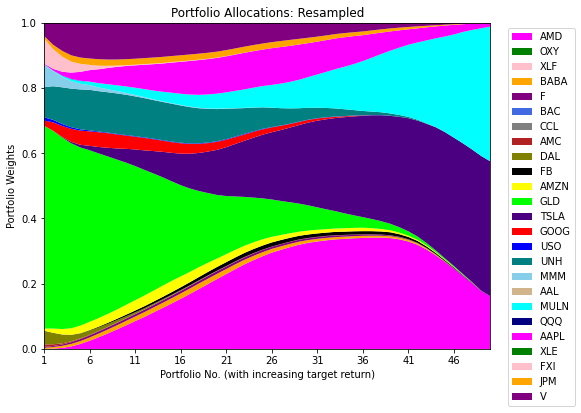

In [ ]:
#Missing variables - do not run

x_tick = np.arange(len(targetRet))+1
color_list = ['fuchsia','green','pink','orange','purple','royalblue','grey','firebrick','olive','black','yellow','lime','indigo','red','blue','teal','skyblue','tan','cyan','navy']
plt.figure(figsize=(8, 6))
plt.stackplot(x_tick, np.array(a).T, colors=color_list)
plt.legend(df1.columns[1:], bbox_to_anchor=(1.2, 1))
plt.xlim((1,len(targetRet)))
plt.ylim((0,1))
plt.xticks(np.arange(1,len(targetRet)+1,5))
plt.xlabel("Portfolio No. (with increasing target return)")
plt.ylabel("Portfolio Weights")
plt.title("Portfolio Allocations: Resampled")
plt.show()

